<a href="https://colab.research.google.com/github/kelvinchiluwe/advanced_machine_learning_algorithms/blob/main/Copy_of_ccovolution_network1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# from tensorflow.keras.layers import SparseCategoricalCossentropy
# from tensorflow.keras.layers import SparseCategoricalCrossentropy

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train=X_train / 255.0
X_test=X_test / 250.0

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [ ]:
# X_train = X_train.reshape(-1, 32, 32, 3)


In [6]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=(40),kernel_size=(4,4),activation='relu',input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(filters=(80),kernel_size=(4,4),activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')

])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 29, 29, 40)     │         1,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 9, 9, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 6, 6, 80)       │        51,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 80)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        20,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,434 (290.76 KB)

 Trainable params: 74,434 (290.76 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history=model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_test,y_test),
    verbose=1
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.3463 - loss: 1.7632 - val_accuracy: 0.5599 - val_loss: 1.2597
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.5691 - loss: 1.2257 - val_accuracy: 0.6188 - val_loss: 1.1044
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.6283 - loss: 1.0728 - val_accuracy: 0.6505 - val_loss: 1.0093
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.6653 - loss: 0.9730 - val_accuracy: 0.6511 - val_loss: 1.0226
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.6888 - loss: 0.9060 - val_accuracy: 0.6509 - val_loss: 1.0213
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7060 - loss: 0.8519 - val_accuracy: 0.6733 - val_loss: 0.9525
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.7159 - loss: 0.8178 - val_accuracy: 0.6788 - val_loss: 0.9339
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.7282 -

In [8]:
loss,accuracy=model.evaluate(X_test,y_test)
accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7029 - loss: 0.8921


0.7021999955177307

In [9]:
img =  tf.keras.utils.load_img("bird.jpg", target_size=(32, 32))
img_array = tf.keras.utils.img_to_array(img)

In [10]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
img_normalize= img_array/255.0

In [12]:
img_batch = np.expand_dims(img_normalize, axis=0)

In [13]:
prediction_probs = model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [14]:
prediction_probs

array([[5.6010275e-03, 1.2735114e-05, 8.8624090e-01, 1.6274028e-02,
        1.3652936e-03, 3.6881496e-03, 8.2412474e-02, 4.8948747e-05,
        4.3047015e-03, 5.1679574e-05]], dtype=float32)

In [15]:
pred_index = np.argmax(prediction_probs)
pred_index

np.int64(2)

In [16]:
class_names[pred_index]

'bird'

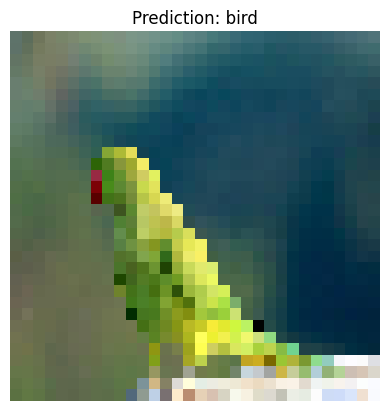

The model predicted this image is a: bird
Prediction probabilities: [[5.6010275e-03 1.2735114e-05 8.8624090e-01 1.6274028e-02 1.3652936e-03
  3.6881496e-03 8.2412474e-02 4.8948747e-05 4.3047015e-03 5.1679574e-05]]


In [17]:
# Show the results
plt.figure()
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {class_names[pred_index]}")
plt.axis('off')
plt.show()

print(f"The model predicted this image is a: {class_names[pred_index]}")
print(f"Prediction probabilities: {prediction_probs}")